In [1]:
import osmnx as ox

In [2]:
import geopandas as gpd

In [53]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None 

In [11]:
seltypes = ['cycleway', 'footway', 'steps', 'pedestrian', 'residential',
            'crossing', 'path', 'living_street', 'construction', 
            'track', 'services', 'service', 'bridleway']

In [4]:
seltypes = ['motorway','motorway_link','trunk','trunk_link','primary','primary_link',
            'secondary','secondary_link', 'tertiary', 'tertiary_link' , 'unclassified',
            'residential', 'living_street', 'service', 'path', 'footway', 'pedestrian',
            'steps', 'cycleway']

In [16]:
# function to download bike and pedestrian paths from OSM
def get_bikeped_path(place_name, seltypes=None):
    tags = {'highway': True}
    highway = ox.geometries_from_place(place_name, tags)
    if seltypes is None:
        pedbike = highway[highway.type == 'LineString']
    else:
        pedbike = highway[(highway.highway.isin(seltypes)) & (highway.type == 'LineString')]
    pedbike.loc[:, 'osmid'] = list(map(lambda x: x[1], list(pedbike.index)))
    pedbike.rename(columns = {'highway': 'path_type'}, inplace=True)
    pedbike.loc[:, 'city'] = place_name.split(',')[0]
    waygdf = pedbike[['osmid', 'path_type', 'city', 'geometry']]
    return waygdf

In [17]:
# test the function
bikeped = get_bikeped_path(place_name="Eugene, OR, USA")

In [6]:
place_names = ["Eugene, OR, USA", "Springfield, OR, USA", "Coburg, OR, USA"]

In [18]:
bikepedlist = []

In [19]:
# download the data for CLMPO cities
for place_name in place_names:
    bikepedlist.append(get_bikeped_path(place_name=place_name))

In [20]:
bikeped = pd.concat(bikepedlist)

In [21]:
outname = 'highway_osm'

In [23]:
bikeped.to_file(fr'T:\MPO\Bike&Ped\{outname}.shp', index=False)

Please ignore below lines

In [52]:
graph = ox.graph_from_place(place_names)

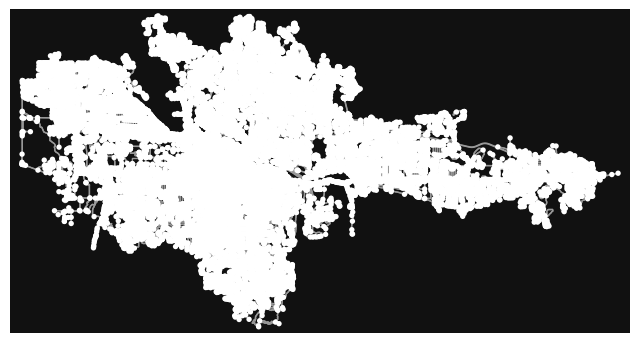

In [54]:
fig, ax = ox.plot_graph(graph)

In [90]:
nodes, edges = ox.graph_to_gdfs(graph)

In [74]:
type(edges.osmid.values[0])

int

<Axes: >

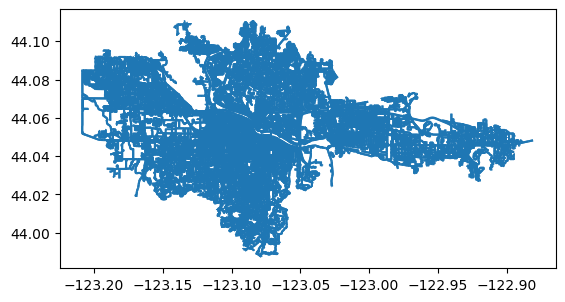

In [75]:
edges.plot()

In [77]:
edges.columns

Index(['osmid', 'name', 'highway', 'oneway', 'reversed', 'length', 'geometry',
       'lanes', 'ref', 'maxspeed', 'service', 'bridge', 'tunnel', 'access',
       'width', 'junction', 'est_width', 'area'],
      dtype='object')

In [78]:
edges.dtypes

osmid          object
name           object
highway        object
oneway           bool
reversed       object
length        float64
geometry     geometry
lanes          object
ref            object
maxspeed       object
service        object
bridge         object
tunnel         object
access         object
width          object
junction       object
est_width      object
area           object
dtype: object

In [104]:
ox.save_graph_geopackage(graph, filepath="T:/MPO/Bike&Ped/graph.gpkg")

In [105]:
place_name = ["Eugene, OR, USA"]

In [70]:
place_name = ["Springfield, OR, USA"]

In [80]:
place_name = ["Coburg, OR, USA"]

In [109]:
graph = ox.graph_from_place(place_names, network_type='walk')

In [110]:
nodes, edges = ox.graph_to_gdfs(graph)

<Axes: >

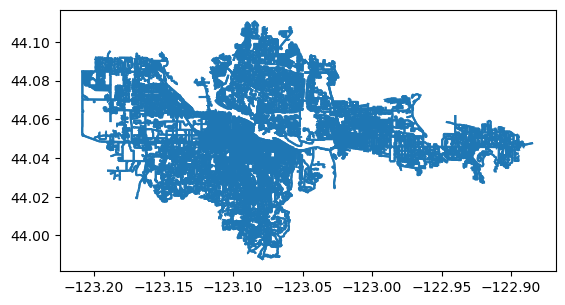

In [111]:
edges.plot()

In [112]:
ox.save_graph_geopackage(graph, filepath="T:/MPO/Bike&Ped/walk.gpkg")

In [93]:
area = ox.geocode_to_gdf(place_names)

In [95]:
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"MULTIPOLYGON (((-123.13062 44.12435, -123.1304...",44.132272,43.987529,-123.035886,-123.208758,298358072,relation,186706,44.050505,-123.095051,"Eugene, Lane County, Oregon, United States",boundary,administrative,0.788764
1,"MULTIPOLYGON (((-123.05014 44.05531, -123.0501...",44.094935,44.023536,-122.879054,-123.050143,298040144,relation,186721,44.046236,-123.022029,"Springfield, Lane County, Oregon, United States",boundary,administrative,0.672105
2,"POLYGON ((-123.07389 44.14244, -123.07324 44.1...",44.151722,44.126433,-123.048157,-123.073885,298038052,relation,186697,44.137628,-123.066200,"Coburg, Lane County, Oregon, 97408, United States",boundary,administrative,0.600880


In [7]:
type(area)

geopandas.geodataframe.GeoDataFrame

<Axes: >

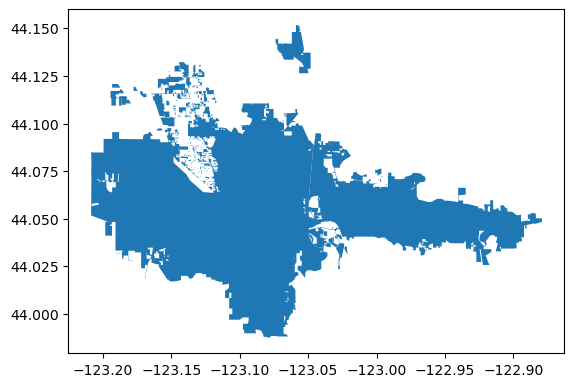

In [96]:
area.plot()

In [103]:
tags = {'highway': True}
highway = ox.geometries_from_place(place_names, tags)

In [10]:
selcols = ['highway','geometry','traffic_signals','crossing','bicycle',
           'access','stop','direction','foot','cycleway','footway',
           'sidewalk', 'lanes', 'construction']

In [32]:
sorted(highway.columns)

['NHS',
 'abandoned',
 'access',
 'access:lanes',
 'access_aisle',
 'addr:city',
 'addr:housenumber',
 'addr:postcode',
 'addr:state',
 'addr:street',
 'addr:unit',
 'alt_name',
 'amenity',
 'area',
 'bench',
 'bicycle',
 'bicycle:lanes',
 'bin',
 'brand',
 'brand:wikidata',
 'bridge',
 'bridge:name',
 'bridge:structure',
 'building:part',
 'bus',
 'bus:lanes',
 'busway',
 'busway:right',
 'button_operated',
 'camera:mount',
 'camera:type',
 'change:lanes',
 'change:lanes:forward',
 'check_date',
 'check_date:surface',
 'colour',
 'comment',
 'compensator',
 'construction',
 'county',
 'covered',
 'crossing',
 'crossing:island',
 'crossing:light',
 'crossing:markings',
 'crossing_ref',
 'cycleway',
 'cycleway:both',
 'cycleway:both:lane',
 'cycleway:buffer',
 'cycleway:left',
 'cycleway:left:buffer',
 'cycleway:left:oneway',
 'cycleway:right',
 'cycleway:right:lane',
 'departures_board',
 'description',
 'description:en',
 'design',
 'designation',
 'destination',
 'destination:backwar

In [27]:
highway.type.unique()

array(['Point', 'LineString', 'Polygon', 'MultiPolygon'], dtype=object)

In [28]:
highway.highway.unique()

array(['turning_circle', 'traffic_signals', 'stop', 'turning_loop',
       'motorway_junction', 'crossing', 'mini_roundabout', 'milestone',
       'bus_stop', 'trailhead', 'passing_place', 'give_way',
       'street_lamp', 'services', 'motorway_junction ref=12',
       'residential', 'tertiary', 'service', 'motorway_link', 'motorway',
       'secondary_link', 'track', 'primary', 'tertiary_link', 'secondary',
       'trunk_link', 'primary_link', 'cycleway', 'unclassified',
       'footway', 'proposed', 'path', 'trunk', 'steps', 'pedestrian',
       'busway', 'living_street', 'construction', 'elevator', 'platform'],
      dtype=object)

In [45]:
highway.loc[:, 'osmid'] = list(map(lambda x: x[1], list(highway.index)))

In [50]:
5479468 in list(highway.osmid)

False

In [34]:
highway_p = highway[highway.type.isin(['Polygon', 'MultiPolygon'])]
highway_p.loc[:, 'osmid'] = list(map(lambda x: x[1], list(highway_p.index)))

<Axes: >

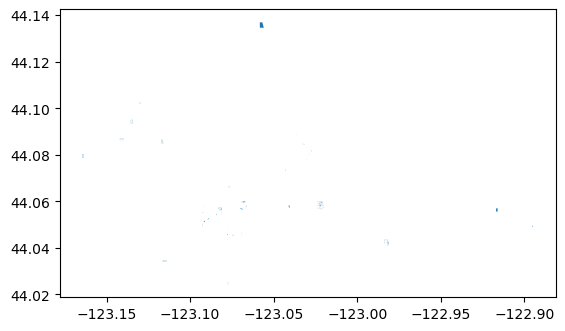

In [35]:
highway_p.plot()

In [37]:
railway = ox.geometries_from_place(place_names, {'railway': True})

In [88]:
seltypes = ['cycleway', 'footway', 'steps', 'pedestrian', 
            'residential', 'crossing', 'path', 'living_street', 
            'construction', 'track', 'services', 'service', 'bridleway']

In [104]:
pedbike = highway[(highway.highway.isin(seltypes)) & (highway.type == 'LineString')]

<Axes: >

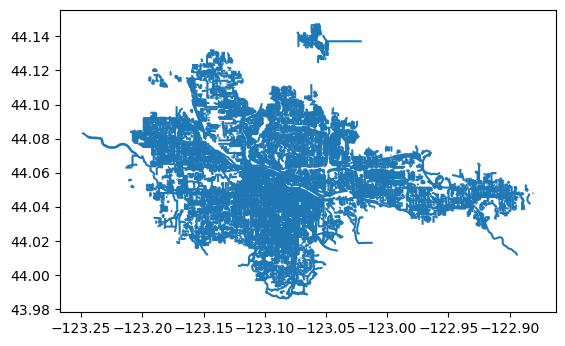

In [105]:
pedbike.plot()

In [107]:
'addr:city' in pedbike.columns

True

In [108]:
pedbike.shape

(21755, 293)

In [110]:
pedbike['addr:city']

element_type  osmid     
way           5453137       NaN
              5453138       NaN
              5453146       NaN
              5453147       NaN
              5453149       NaN
                           ... 
              1156423609    NaN
              1157113537    NaN
              1157122209    NaN
              1157122210    NaN
              1157122211    NaN
Name: addr:city, Length: 21755, dtype: object

In [76]:
pedbike.loc[:, 'osmid'] = list(map(lambda x: x[1], list(pedbike.index)))

In [77]:
pedbike.rename(columns = {'highway': 'path_type'}, inplace=True)

In [68]:
pedbike.loc[:, 'city'] = 'Eugene'

In [78]:
pedbike.loc[:, 'city'] = 'Springfield'

In [69]:
eugway = pedbike[['osmid', 'path_type', 'city', 'geometry']]

In [79]:
sprway = pedbike[['osmid', 'path_type', 'city', 'geometry']]

In [46]:
eugway.head(5)

osmid path_type  \
element_type osmid                        
way          5480179  5480179  cycleway   
             5484202  5484202  cycleway   
             5491163  5491163   footway   
             5496533  5496533   footway   
             5502270  5502270      path   

                                                               geometry  
element_type osmid                                                       
way          5480179  LINESTRING (-123.16057 44.07346, -123.16056 44...  
             5484202  LINESTRING (-123.11502 44.09149, -123.11500 44...  
             5491163  LINESTRING (-123.10639 44.05717, -123.10640 44...  
             5496533  LINESTRING (-123.06732 44.00403, -123.06735 44...  
             5502270  LINESTRING (-123.18821 44.05854, -123.18820 44...

In [15]:
highway.highway.unique()

array(['traffic_signals', 'turning_circle', 'turning_loop',
       'motorway_junction', 'crossing', 'stop', 'mini_roundabout',
       'milestone', 'bus_stop', 'trailhead', 'passing_place', 'give_way',
       'services', 'street_lamp', 'motorway_junction ref=12',
       'residential', 'service', 'tertiary', 'motorway_link', 'motorway',
       'secondary_link', 'primary', 'secondary', 'primary_link',
       'cycleway', 'unclassified', 'footway', 'path', 'tertiary_link',
       'trunk', 'steps', 'pedestrian', 'busway', 'living_street',
       'construction', 'track', 'trunk_link', 'proposed', 'platform'],
      dtype=object)

In [104]:
#highway[(highway.sidewalk != 'no') & (highway.type =='LineString')].plot() #(~highway.sidewalk.isnull()), (highway.type !='Point')

In [55]:
highway.sidewalk.unique()

array([nan, 'no', 'both', 'right', 'left', 'separate', 'yes'],
      dtype=object)

In [56]:
highway.footway.unique()

array([nan, 'sidewalk', 'crossing', 'access_aisle'], dtype=object)

In [58]:
highway.foot.unique()

array([nan, 'private', 'yes', 'designated', 'permissive', 'no',
       'destination'], dtype=object)

In [59]:
highway.access.unique()

array([nan, 'private', 'yes', 'no', 'destination', 'agricultural',
       'permissive', 'customers'], dtype=object)

In [63]:
highway.highway.unique()

array(['traffic_signals', 'turning_circle', 'turning_loop',
       'motorway_junction', 'crossing', 'stop', 'mini_roundabout',
       'milestone', 'bus_stop', 'trailhead', 'passing_place', 'give_way',
       'services', 'street_lamp', 'motorway_junction ref=12',
       'residential', 'service', 'tertiary', 'motorway_link', 'motorway',
       'secondary_link', 'primary', 'secondary', 'primary_link',
       'cycleway', 'unclassified', 'footway', 'path', 'tertiary_link',
       'trunk', 'steps', 'pedestrian', 'busway', 'living_street',
       'construction', 'track', 'trunk_link', 'proposed', 'platform'],
      dtype=object)

In [60]:
sel = (highway.highway=='path') & (highway.bicycle=='designated') & (highway.foot=='designated') & (highway.footway == 'sidewalk')

<Axes: >

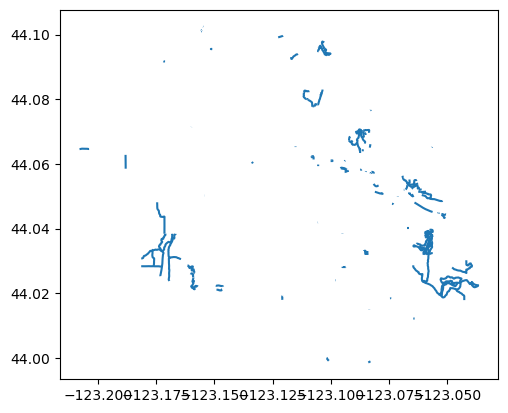

In [65]:
highway[highway.highway=='path'].plot()

<Axes: >

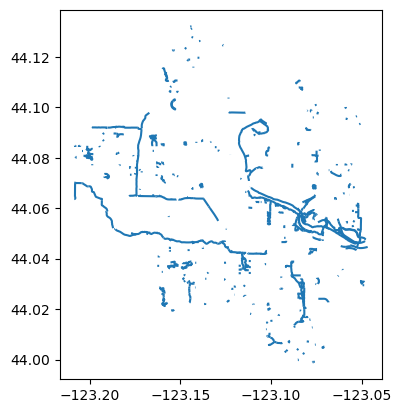

In [64]:
highway[highway.foot=='designated'].plot()

<Axes: >

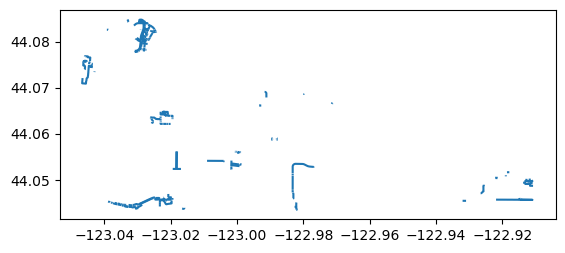

In [91]:
highway[highway.footway == 'sidewalk'].plot()

In [87]:
df = highway[(highway.type =='LineString')][selcols] #(highway.sidewalk != 'no') & 

In [88]:
df.rename(columns={'traffic_signals': 't_signals', 'construction': 'construct'}, inplace=True)

In [89]:
df.to_file('T:/DCProjects/Modeling/Sidewalk/temp/osm_highway_SPR.shp')  

C:\Users\clid1852\AppData\Local\Temp\ipykernel_1200\3232305796.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file('T:/DCProjects/Modeling/Sidewalk/temp/osm_highway_SPR.shp')


In [10]:
buildings  = buildings.loc[buildings.geom_type == 'Polygon', buildings.columns.str.contains('addr:|geometry')]

In [11]:
buildings.columns = buildings.columns.str.replace("addr:", "")

In [12]:
buildings.rename(columns={'housenumber': 'houseNo'}, inplace=True)

In [13]:
buildings.columns

Index(['state', 'geometry', 'city', 'country', 'houseNo', 'postcode',
       'street'],
      dtype='object')

In [14]:
# Save footprints 
buildings.to_file('T:/DCProjects/Modeling/Sidewalk/temp/edgewood_buildings.shp')  
# Or save in a more open source format
#buildings.to_file('../temp/edgewood_buildings.geojson', driver='GeoJSON')  

C:\Users\clid1852\AppData\Local\Temp\ipykernel_1200\759818116.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  buildings.to_file('T:/DCProjects/Modeling/Sidewalk/temp/edgewood_buildings.shp')
